In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

with open('../models/prediction_model.pkl', 'rb') as f:
    model = pickle.load(f)

df = pd.read_csv('../data/processed/customer_segments.csv')

X = df[['Age', 'Gender', 'Cluster']]
y_actual = df['Purchase_Amount']
y_pred = model.predict(X)

df['Predicted_Amount'] = y_pred
print(df[['Full_Name', 'Purchase_Amount', 'Predicted_Amount']].head())

                        Full_Name  Purchase_Amount  Predicted_Amount
0      Torayev Asadbek Ilhomovich             1200       1194.927381
1  Nishonov Mirzabek Mrodbek ogli              850        828.800000
2  BOLTAYEV JASURBEK SHUXRAT OGLI              300        263.706667
3   Eshbekov Sardor Namozboy ogli              150        267.256667
4             Rahmonova Mehrigiyo              450        397.176667


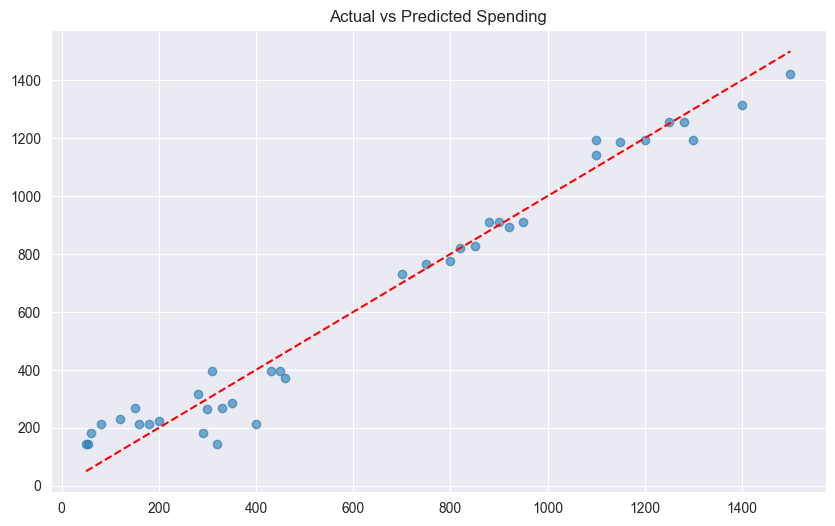

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(y_actual, y_pred, alpha=0.6)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--')
plt.title('Actual vs Predicted Spending')
plt.savefig('../reports/figures/spending_patterns.png')
plt.show()